In [1]:
%matplotlib inline
import SemDiff as sd
import pandas as pd
from gensim.models import Word2Vec
from gensim.models import FastText

In [2]:
DATA_PATH = '/Users/bsobolik/Documents/semantic_difference/data/L665/'

In [3]:
# load data samples
intro = pd.read_csv(DATA_PATH + 'introduction_million_sample.rpt', sep = "\t")
methods = pd.read_csv(DATA_PATH + 'methods_million_sample.rpt', sep = "\t")
discussion = pd.read_csv(DATA_PATH + 'discussion_million_sample.rpt', sep = "\t")

In [7]:
# Due to the time it takes to train, lets only use a fraction of the total 
intro = intro.loc[:50000, :]
methods = methods.loc[:50000, ]
discussion = discussion.loc[:50000, ]

In [8]:
# Here we preprocess the sentence data, removing whitespace, punctuation, and non-alphanumeric characteris
intro_features = sd.preprocess_data(intro, 
                                    text_col='text', 
                                    duplicate_cols = ['doi', 'sentence_seq'], 
                                    verbose=True)

methods_features = sd.preprocess_data(methods, 
                                      text_col='text', 
                                      duplicate_cols = ['doi', 'sentence_seq'], 
                                      verbose=True)

discussion_features = sd.preprocess_data(discussion, 
                                         text_col='text', 
                                         duplicate_cols = ['doi', 'sentence_seq'], 
                                         verbose=True)

Total time: 2.256014823913574 secs
Total time: 2.106531858444214 secs
Total time: 2.2943880558013916 secs


In [9]:
import multiprocessing

In [10]:
# First train the model for the introduction data
intro_model = FastText(intro_features, 
                       word_ngrams = 1,
                       workers=multiprocessing.cpu_count(), 
                       size=100, 
                       min_count = 10, 
                       window = 5,
                       sample = 1e-3)

In [11]:
# Then train the model for the methods data
methods_model = FastText(methods_features, 
                         word_ngrams = 1,
                         workers=multiprocessing.cpu_count(), 
                         size=100, 
                         min_count = 10, 
                         window = 5,
                         sample = 1e-3)

In [16]:
# Then train the model for the methods data
discussion_model = FastText(discussion_features, 
                            word_ngrams = 1,
                            workers=multiprocessing.cpu_count(), 
                            size=100, 
                            min_count = 10, 
                            window = 5,
                            sample = 1e-3)

In [17]:
# Save the models
intro_model.save("intro_citance_model_fasttext.wv")
methods_model.save("methods_citance_model_fasttext.wv")
discussion_model.save("discussion_citance_model_fasttext.wv")

In [8]:
# Now load the models, just to demonstrate how it works
intro_model = Word2Vec.load("intro_citance_model_fasttex.wv")
methods_model = Word2Vec.load("methods_citance_model_fasttex.wv")
discussion_model = Word2Vec.load("discussion_citance_model_fasttex.wv")

In [18]:
shared = sd.get_shared_words(intro_model, discussion_model, topn_words = 100)
shared[:5]

['the', 'of', 'and', 'in', 'to']

In [19]:
df = sd.model_term_similarity(intro_model, discussion_model, "theory", shared)
df

,word,x,y
0,theory,0.573122,0.607422
1,theory,-0.106051,-0.098647
2,theory,-0.223685,-0.076939
3,theory,0.008725,-0.096393
4,theory,-0.024037,0.001781
5,theory,0.228484,0.156050
6,theory,-0.098592,-0.075284
7,theory,-0.028436,-0.065179
8,theory,0.230291,0.216641
9,theory,0.084476,0.062824


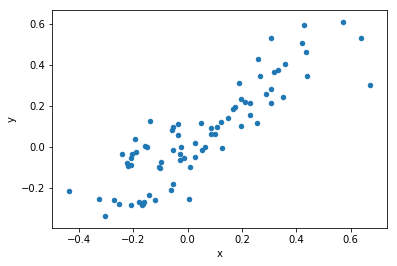

In [20]:
import matplotlib
df.plot('x', 'y', kind='scatter')